In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats


In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

In [6]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [8]:
# Summary statistics for numerical features
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


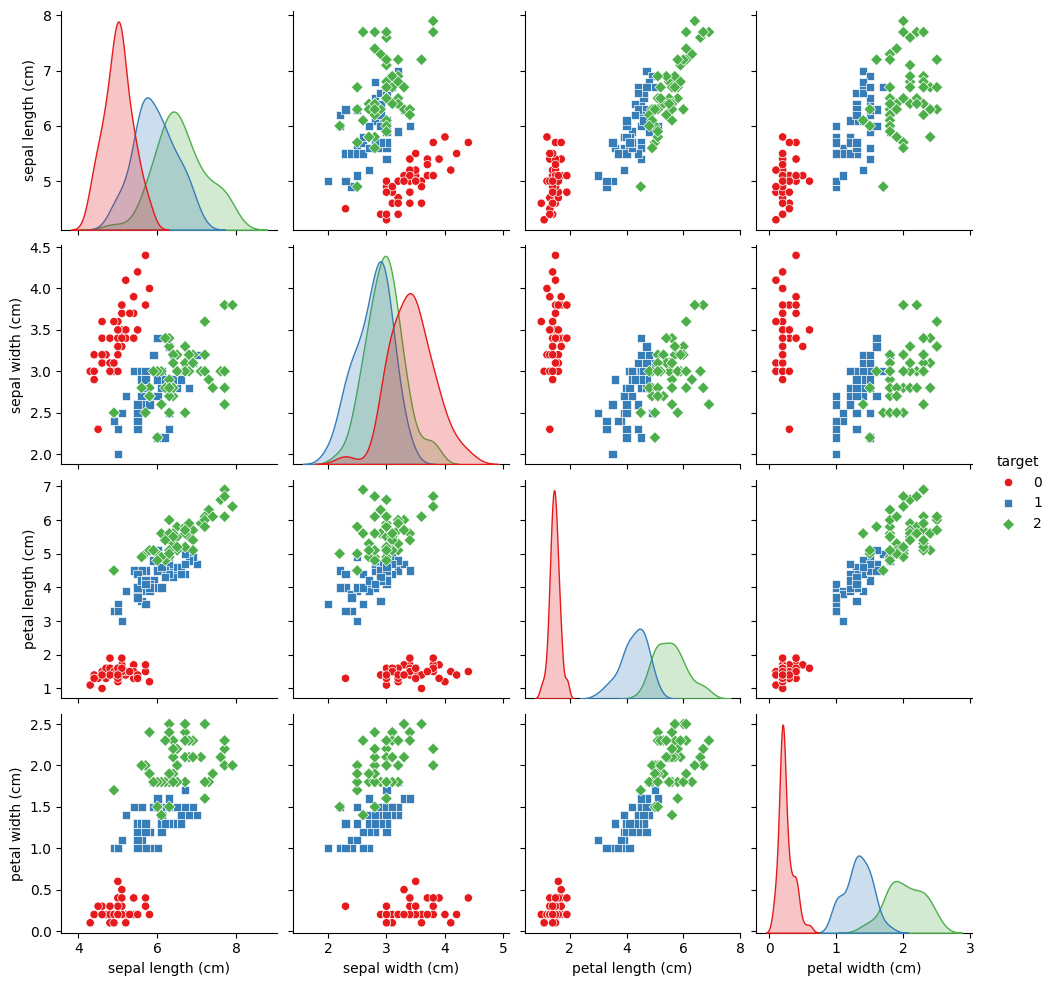

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='target', palette='Set1', markers=["o", "s", "D"])
plt.show()


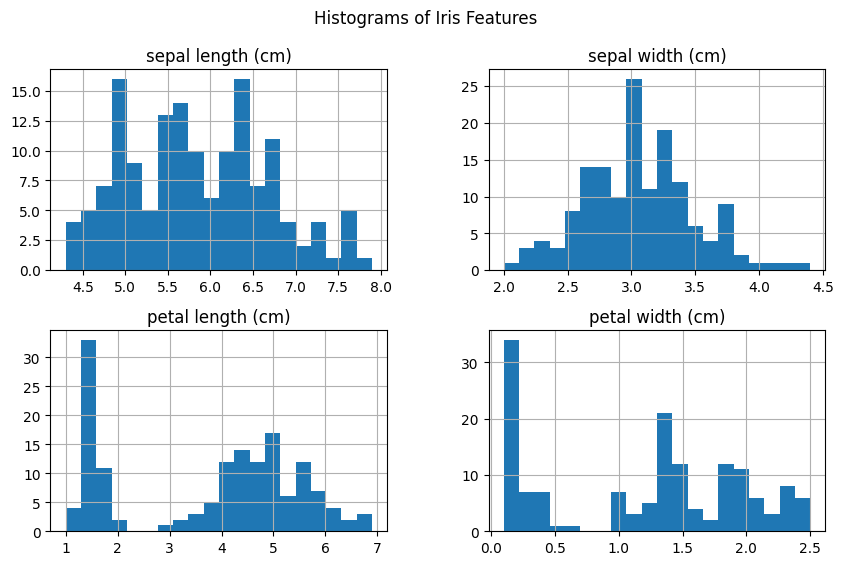

In [10]:
# Histogram to show distribution of each feature
iris_df.drop(columns='target').hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Iris Features')
plt.show()

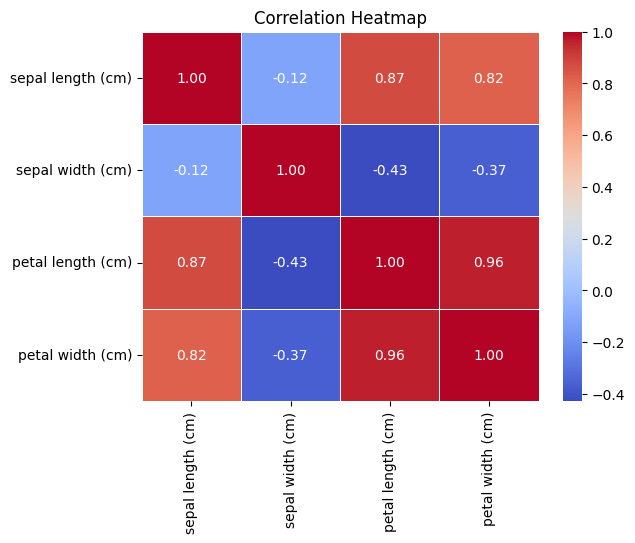

In [11]:
# Correlation heatmap to see how features correlate with each other
correlation_matrix = iris_df.drop(columns='target').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


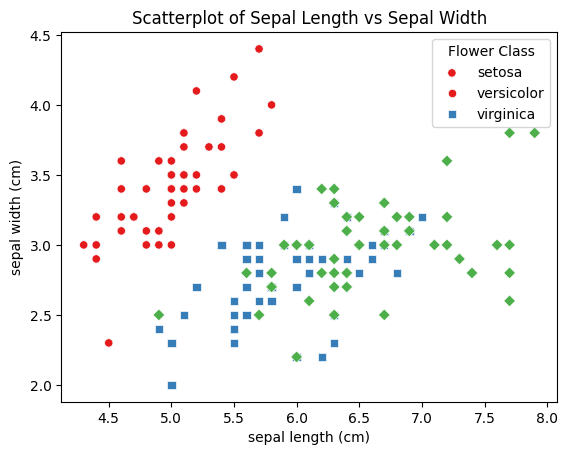

In [12]:
# Scatterplot for the first two features (sepal length and sepal width) and color-coded by class
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue='target', palette='Set1', style='target', data=iris_df, markers=["o", "s", "D"])
plt.title("Scatterplot of Sepal Length vs Sepal Width")
plt.xlabel(iris.feature_names[0])  # Sepal length
plt.ylabel(iris.feature_names[1])  # Sepal width
plt.legend(title='Flower Class', labels=iris.target_names)
plt.show()


In [14]:
# Z-score to detect outliers (threshold = 3 standard deviations)
z_scores = np.abs(stats.zscore(iris_df.drop(columns='target')))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers detected: {np.sum(outliers)}')

Number of outliers detected: 1


In [15]:
iris_df_no_outliers = iris_df[~outliers]
X_no_outliers = iris_df_no_outliers.drop(columns='target')
y_no_outliers = iris_df_no_outliers['target']

In [16]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

In [17]:
# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Create and train a multinomial logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train_scaled, y_train)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [19]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.11%


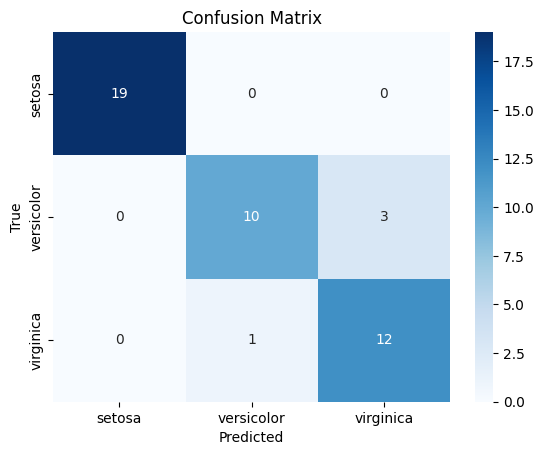

In [21]:
# Confusion Matrix to evaluate classification performance
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.91      0.77      0.83        13
   virginica       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45

